In [221]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [222]:
path=r"C:\Users\guest\Downloads\Road_in_Norway.jpg"

In [223]:
img=cv2.imread(path)

(<matplotlib.image.AxesImage at 0x2c5a0f18280>, (882, 1346, 3))

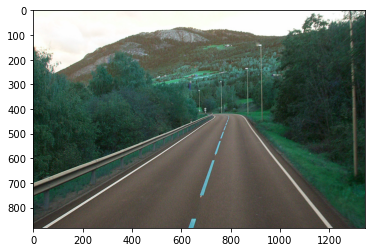

In [224]:
plt.imshow(img),img.shape

In [225]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

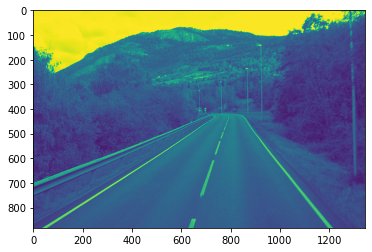

In [226]:
plt.imshow(gray)

In [227]:
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
edges = cv2.Canny(blurred, 50, 200)

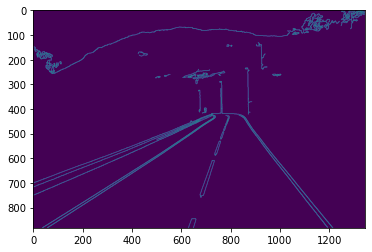

In [228]:
plt.imshow(edges)

In [229]:
threshold = 150
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength=50, maxLineGap=250)

In [230]:
lines.shape

(17, 1, 4)

In [231]:
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)


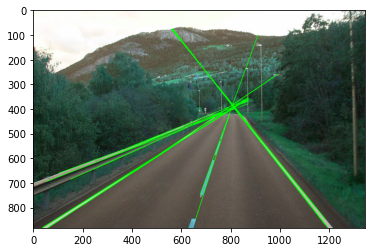

In [232]:
plt.imshow(img)

### Lets try the otsu thresholding and see how it perfoms

In [233]:
img_otsu=cv2.imread(path)

In [234]:
gray = cv2.cvtColor(img_otsu, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)


In [235]:
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


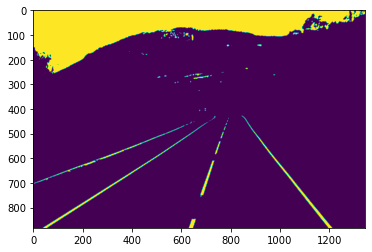

In [236]:
plt.imshow(thresh)

In [237]:
# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img_otsu, contours, -1, (0, 255, 0), 2);

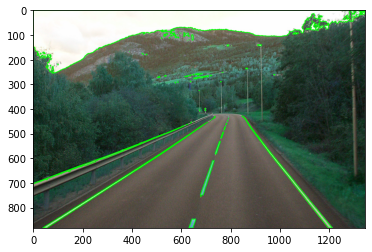

In [238]:
plt.imshow(img_otsu)

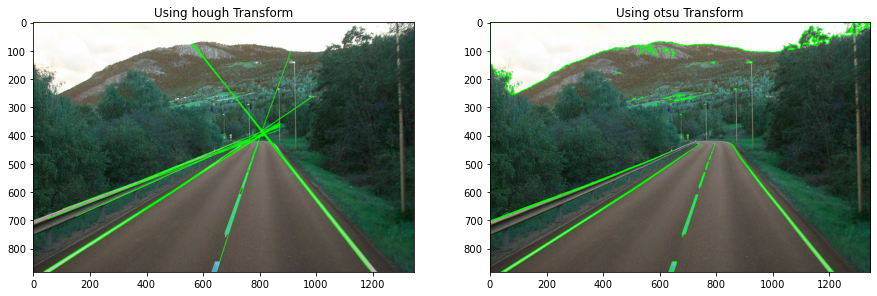

In [239]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15,10))

# Display image 1 in the first subplot
axs[0].imshow(img)
axs[0].set_title("Using hough Transform")

# Display image 2 in the second subplot
axs[1].imshow(img_otsu)
axs[1].set_title("Using otsu Transform")

plt.show()